# Denise lo hace bonito luego

In [55]:
# === IMPORTS ===

# Generales
import random

# Redes Neuronales
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torchvision.models import alexnet, AlexNet_Weights, vgg19, VGG19_Weights
from torchvision import transforms

# Visualization
import matplotlib.pyplot as plt

In [56]:
# GPU Usage

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)

Usando dispositivo: cuda


In [57]:
# Data Importing
dataset = torch.load("p3_data/cifar10_subset.pt")


|Label| Meaning |
|--|--|
| 0 | airplane |
| 1 | automobile |
| 2 | bird |
| 3 | cat |
| 4 | deer |
| 5 | dog |
| 6 | frog |
| 7 | horse |
| 8 | ship |
| 9 | truck |



In [58]:
label_dict = {
    '0': 'airplane',
    '1': 'automobile',
    '2': 'bird',
    '3': 'cat',
    '4': 'deer',
    '5': 'dog',
    '6': 'frog',
    '7': 'horse',
    '8': 'ship',
    '9': 'truck',
}

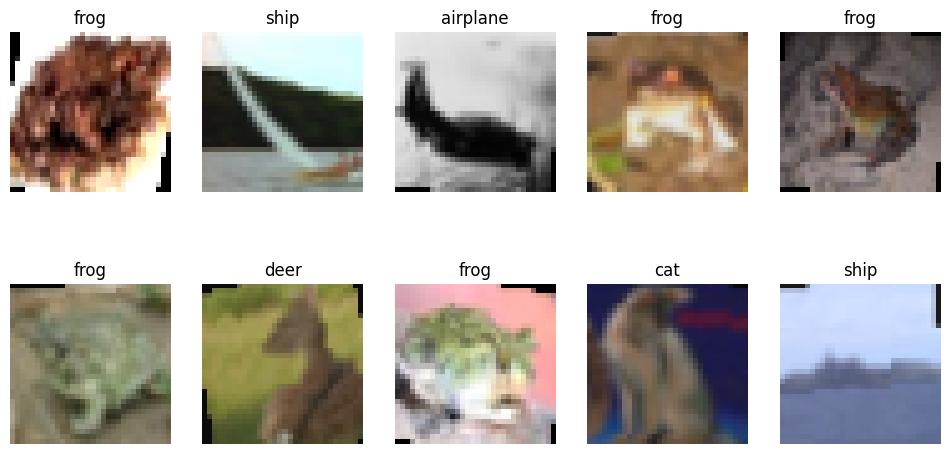

In [59]:
# Quick image preview
images, labels = dataset

idxs = random.sample(range(len(images)), 10)
sample_images = images[idxs]
sample_labels = labels[idxs]

plt.figure(figsize=(12,6))
for i, (img, label) in enumerate(zip(sample_images, sample_labels)):
    plt.subplot(2,5, i+ 1)
    plt.imshow(img.permute(1,2,0))
    plt.title(label_dict[str(label.item())])
    plt.axis('off')
plt.show()

# Full Configurations to try

## Models
- AlexNet
- VGG
- Own Design

## Seeds
- Seed 1
- Seed 2
- Seed 3

## Factors & Conditions

- Optimizers (SGD, Adam, AdamW)
- Regularization (1e-4, 5e-4, 2e-3)
- Batch Size (32, 128, 512)
- Learning-Rate Schedules (StepLR, Cosine, OneCycle)
- Weight Initialization (Kaiming, Xavier, Orthogonal)

Total -> 135

# Train-Test Split and final data preparation

In [60]:
images = F.interpolate(images, size=(224, 224), mode='bilinear', align_corners=False) # To make images 224x224, a requirement for both AlexNet and VGG19

dataset = TensorDataset(images, labels)
train_size = int(0.8 * len(dataset)) # 80% train
test_size = len(dataset) - train_size #20% test
train_ds, test_ds = torch.utils.data.random_split(dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42)) # Same seed so data is always split in the same way

# Modelos

In [61]:
# === 1 - AlexNet ===
alexnet_model = alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)
alexnet_model.classifier[6] = nn.Linear(4096, 10) # Adjusting for our specific dataset
alexnet_model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [62]:
# === 2 - VGG19

vgg19_model = vgg19(weights=VGG19_Weights.IMAGENET1K_V1)
vgg19_model.classifier[6] = nn.Linear(4096, 10) # Same as above
vgg19_model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [63]:
# === 3 - Own Design ===

# COMING SOON

# Training

In [64]:
OPTIMIZER_OPTIONS = ['Adam','AdamW','SGD'] # SGD must have a momentum of 0.9
REGULARIZATION_OPTIONS = [1e-4, 5e-4, 2e-3]
BATCH_SIZE_OPTIONS = [32, 128, 512]
LR_SCHEDULES_OPTIONS = ['Constant', 'StepLR', 'Cosine']
WEIGHT_INITIALIZATION_OPTIONS = ['Kaiming', 'Xavier', 'Orthogonal']

# Subject to change